# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
scaler = StandardScaler()

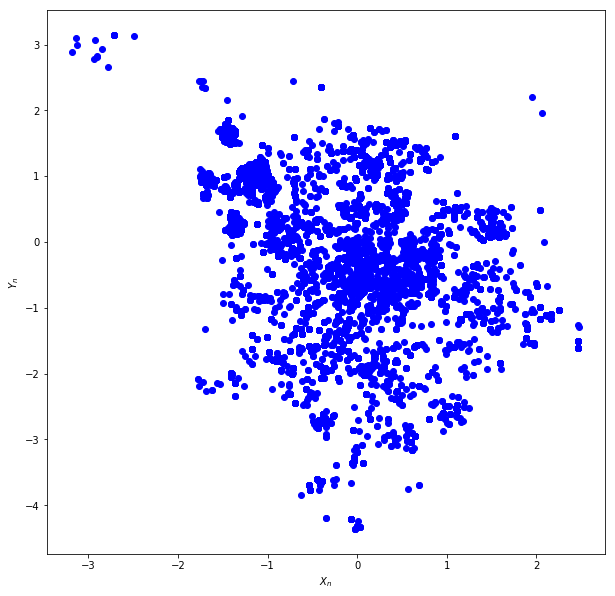

In [19]:
data = pd.read_excel('geo_comment.xlsx')
coord = scaler.fit_transform(data.iloc[:,1:3])
plt.figure(figsize=(10, 10))
plt.plot(coord[:,0], coord[:,1] ,'bo')
plt.xlabel('$X_n$')
plt.ylabel('$Y_n$')
plt.show()

### Звдвние 1.
##### Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
Я буду выполнять это задание совместно с заданием 3 (подбор оптимального количества кластеров), т.к. при первом взгяде на входные данные для меня не очевидно на какое число кластеров их бить.

In [20]:
k_inertia = []
ks = range(1,55)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord, )
    k_inertia.append(clf_kmeans.inertia_)

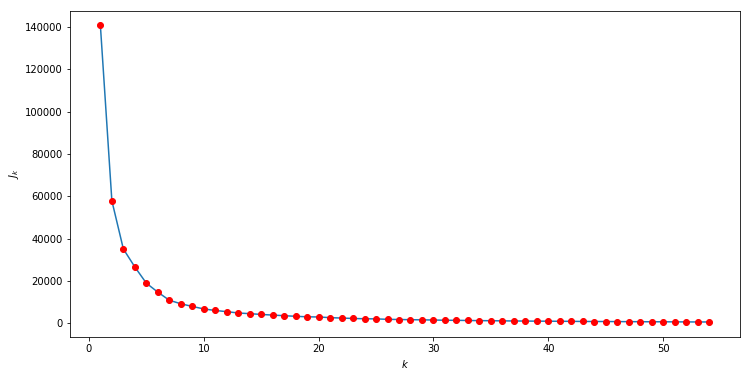

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('$k$')
plt.ylabel('$J_k$')
plt.show()

Как можно видеть умень J_k (Сумма квадратов ростояний от центра кластера до его точек) падает очень плавно и применить метод "локтя"(найти точку изменения характера подения функции) не удается.
Поэтому продолжим анализ и построим график приращения J_k.

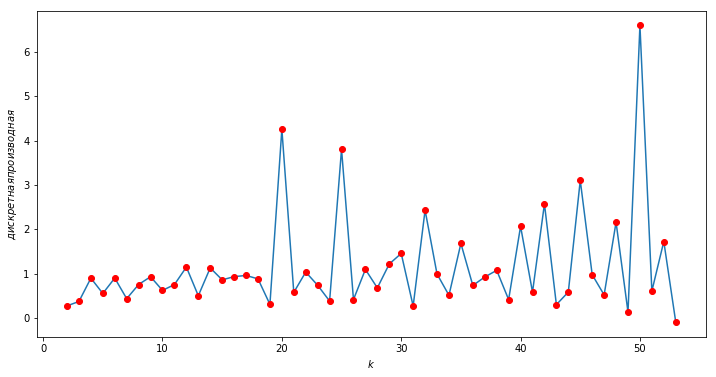

In [22]:
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
plt.figure(figsize=(12, 6))
plt.plot(ks[1:-1], diff_r)
plt.plot(ks[1:-1], diff_r,'ro')
plt.xlabel('$k$')
plt.ylabel('$дискретная производная$')
plt.show()

Как можно видеть минимальное значение достигается при количестве кластеров 49.
Теперь визуализируем эту кластеризацию.

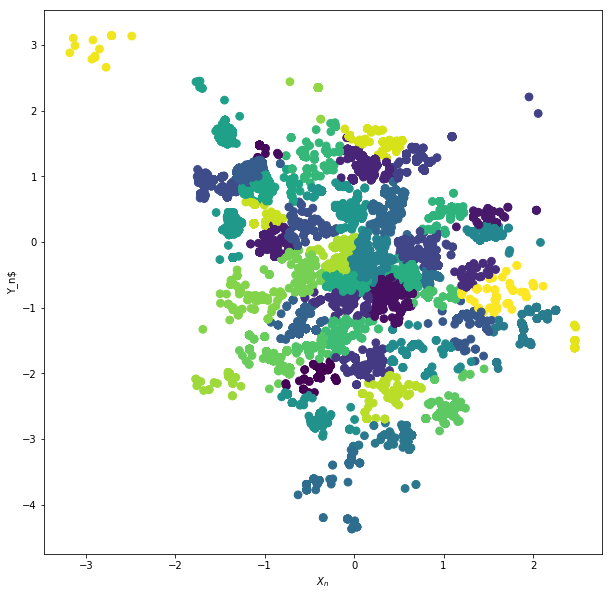

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(coord[:, 0], coord[:, 1], c=KMeans(n_clusters=49).fit_predict(coord), s=60)
plt.xlabel('$X_n$')
plt.ylabel('Y_n$')
plt.show()

### Звдвние 2.
##### Исследовать скопления голосов за и против (отдельно)
Как и предыдущее, я буду выполнять это задание совместно с заданием 3 (подбор оптимального количества кластеров).

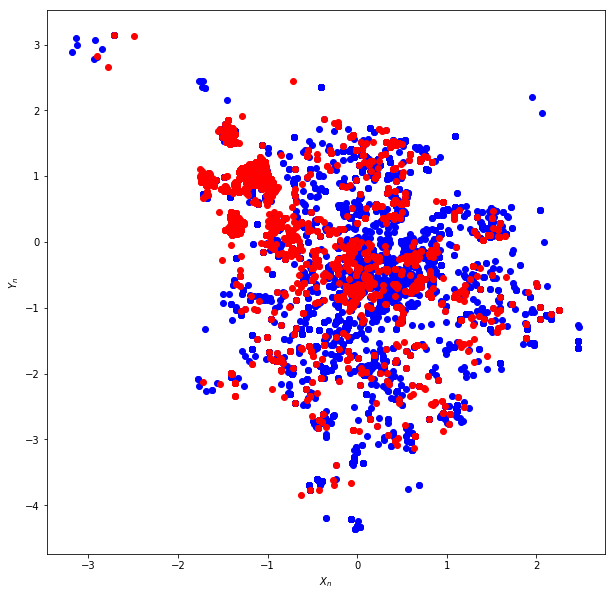

In [24]:
plt.figure(figsize=(10, 10))
coord0=coord[data.comment_class==-1,:]# те кто "за"
coord1=coord[data.comment_class==1,:]# те кто "против"
plt.plot(coord0[:,0], coord0[:,1] ,'bo',coord1[:,0], coord1[:,1] ,'ro')
plt.xlabel('$X_n$')
plt.ylabel('$Y_n$')
plt.show()

In [7]:
KMeans(n_clusters=3).fit_predict(coord0).inertia_

AttributeError: 'numpy.ndarray' object has no attribute 'inertia_'

Итак, решим эту задачу для тех кто "против".

In [25]:
k_inertia0 = []

for k in ks:
    km = KMeans(n_clusters=k)
    km = km.fit(coord0)
    k_inertia0.append(km.inertia_)

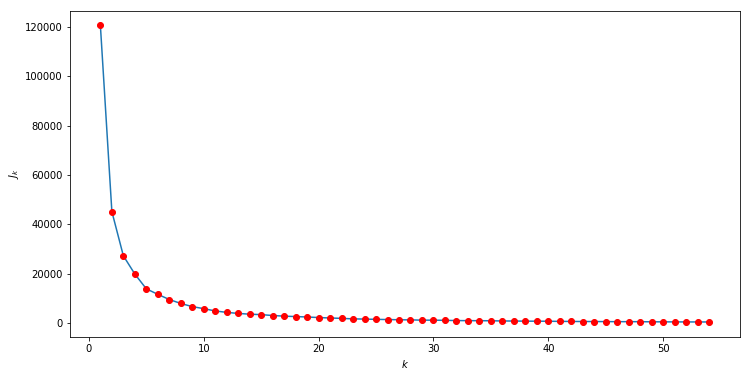

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(ks, k_inertia0)
plt.plot(ks, k_inertia0 ,'ro')
plt.xlabel('$k$')
plt.ylabel('$J_k$')
plt.show()

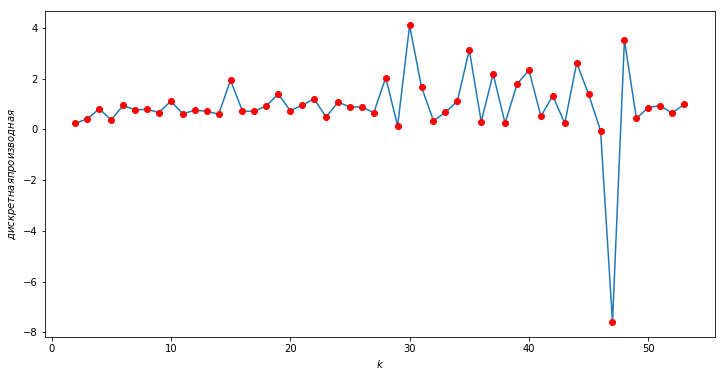

In [27]:
diff0 = np.diff(k_inertia0)
diff_r0 = diff0[1:] / diff0[:-1]
plt.figure(figsize=(12, 6))
plt.plot(ks[1:-1], diff_r0)
plt.plot(ks[1:-1], diff_r0,'ro')
plt.xlabel('$k$')
plt.ylabel('$дискретная производная$')
plt.show()

Минимальное значение достигается при количестве кластеров 34. Визуализируем эту кластеризацию.

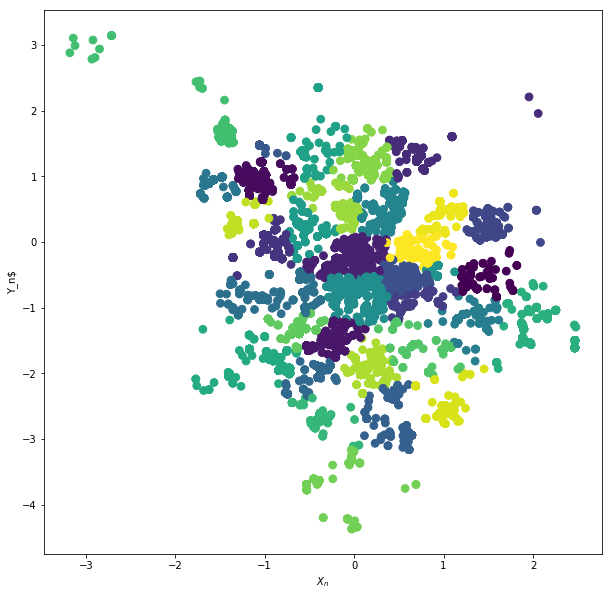

In [28]:
plt.figure(figsize=(10, 10))
plt.scatter(coord0[:, 0], coord0[:, 1], c=KMeans(n_clusters=34).fit_predict(coord0), s=60)
plt.xlabel('$X_n$')
plt.ylabel('Y_n$')
plt.show()

Теперь, решим эту задачу для тех кто "за".

In [29]:
k_inertia1 = []

for k in ks:
    km = KMeans(n_clusters=k)
    km = km.fit(coord1)
    k_inertia1.append(km.inertia_)

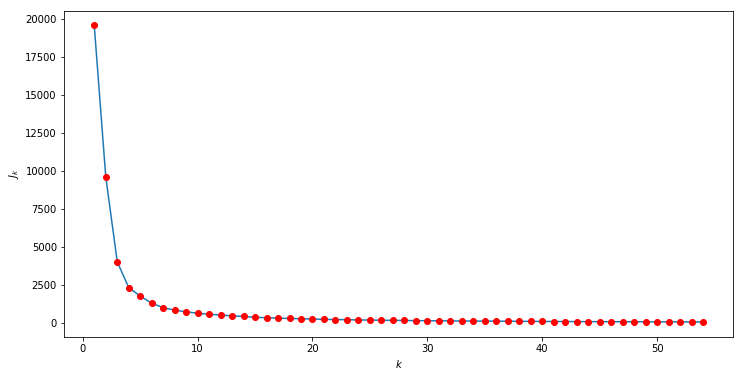

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(ks, k_inertia1)
plt.plot(ks, k_inertia1 ,'ro')
plt.xlabel('$k$')
plt.ylabel('$J_k$')
plt.show()

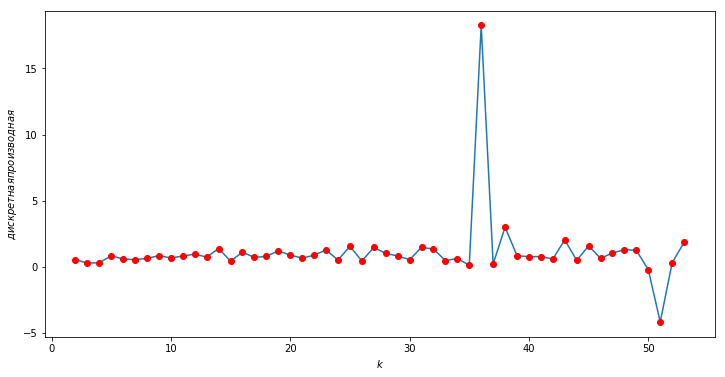

In [31]:
diff1 = np.diff(k_inertia1)
diff_r1 = diff1[1:] / diff1[:-1]
plt.figure(figsize=(12, 6))
plt.plot(ks[1:-1], diff_r1)
plt.plot(ks[1:-1], diff_r1,'ro')
plt.xlabel('$k$')
plt.ylabel('$дискретная производная$')
plt.show()

А здесь, минимальное значение достигается при количестве кластеров 51. Визуализируем эту кластеризацию.

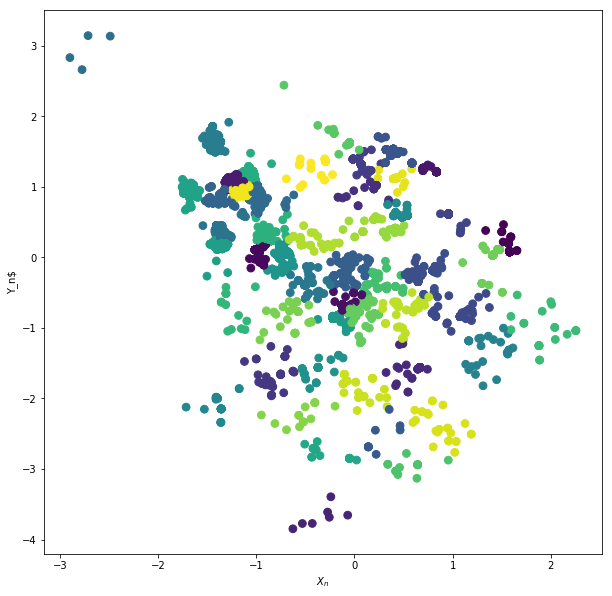

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(coord1[:, 0], coord1[:, 1], c=KMeans(n_clusters=51).fit_predict(coord1), s=60)
plt.xlabel('$X_n$')
plt.ylabel('Y_n$')
plt.show()

### Доп. задание 1.
##### Найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

Т.к. некоторые отзывы были оставлены не одним человеком а группой лиц необходимо добавить в рассматриваемый массив такие строки, причем столько раз сколько голосов было в таком отзыве.
На карте это будут точки с одними и теми же координатами.

In [33]:
coord2 = []
arrow_num= range(1,data.shape[0])
for j in arrow_num:
    for k in range(1,data.multiplier[j]+1):
        coord2.append([coord[j][0],coord[j][1]])
coord2=np.array(coord2)

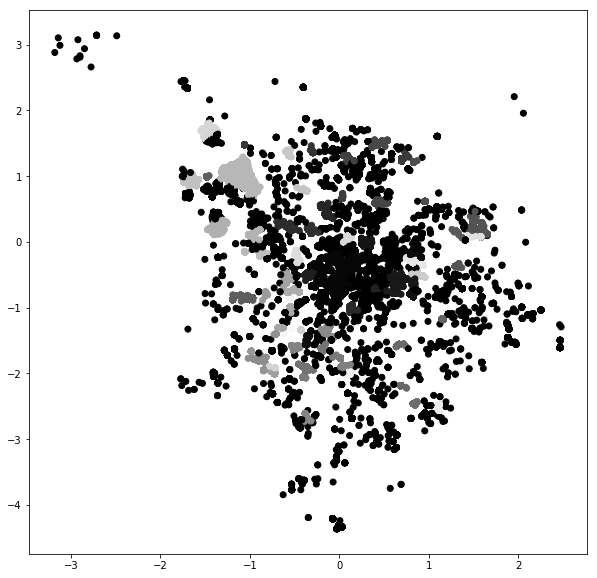

In [88]:
algo = DBSCAN(eps=0.07,min_samples=150)
plt.figure(figsize=(10, 10))
plt.scatter(coord2[:,0],coord2[:,1], c=algo.fit_predict(coord2),cmap='gray')
plt.show()